## Observations and Insights

## Dependencies and starter code

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
data=data.set_index("Mouse ID")
data.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

avg_data=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_data=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_data=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sd_data=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_data=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#Setting the information into the data frame then showing it
summary_statistics=pd.DataFrame({"Mean":avg_data,
                                "Median":median_data,
                                "Variance":var_data,
                                "Standard Deviation":sd_data,
                                "SEM":sem_data})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

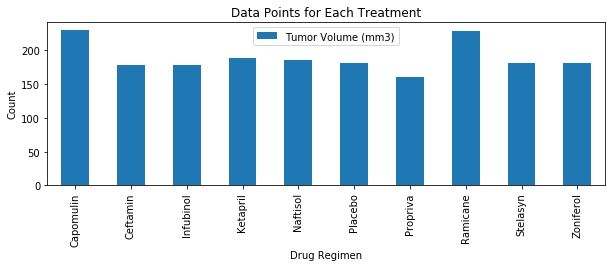

In [227]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Grouping the data for the info needed
data_points=data.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
data_points.plot(kind="bar", figsize=(10,3))
plt.title("Data Points for Each Treatment")
plt.ylabel("Count")
plt.legend()

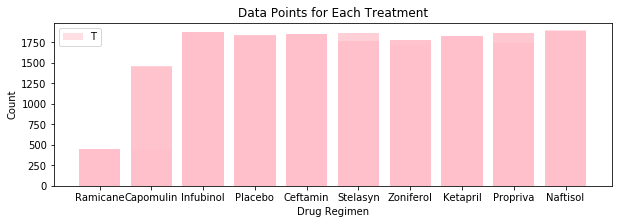

In [255]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data['Tumor Volume (mm3)']))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(data["Drug Regimen"], x_axis, color='pink', alpha=0.5, align="center")
plt.title("Data Points for Each Treatment")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.legend('Tumor Volume (mm3)')
plt.show()

## Pie plots

In [229]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#grouping the data by mouse gender
mouse_gender=data.groupby('Sex').count()
mouse_gender

,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,
Female,935,935,935,935,935,935
Male,958,958,958,958,958,958


Text(0.5, 1.0, 'Females vs. Males')

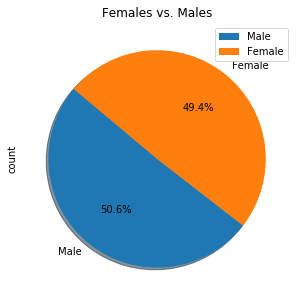

In [248]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = mouse_gender.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Females vs. Males")

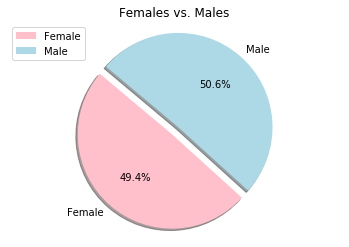

In [231]:
sex=["Female","Male"]
sex_count=[935, 958]
colors=["pink","lightblue"]
explode = (0.1, 0)
plt.pie(sex_count, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Females vs. Males")
plt.legend()

## Quartiles, outliers and boxplots

In [232]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
data=data.reset_index()
final = data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final2 = final.loc[data["Timepoint"] == 45]
final2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [233]:
capomulin = final2[final2['Drug Regimen'].isin(['Capomulin'])]
cap_list = capomulin.sort_values(["Tumor Volume (mm3)"], ascending=True)
cap_list = cap_list["Tumor Volume (mm3)"]
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR for capomulin is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Any tumor volumes below {lower_bound} or above {upper_bound} could be outliers.")

The IQR for capomulin is: 7.781863460000004
Any tumor volumes below 20.70456164999999 or above 51.83201549 could be outliers.


In [234]:
ramicane = final2[final2['Drug Regimen'].isin(['Ramicane'])]
ramicane_list = ramicane.sort_values(["Tumor Volume (mm3)"], ascending=True)
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR for ramicane is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Any tumor volumes below {lower_bound} or above {upper_bound} could be outliers.")

The IQR for ramicane is: 7.527130082499998
Any tumor volumes below 19.690480101250003 or above 49.79900043124999 could be outliers.


In [235]:
Infubinol = final2[final2['Drug Regimen'].isin(['Infubinol'])]
Infubinol_list = Infubinol.sort_values(["Tumor Volume (mm3)"], ascending=True)
Infubinol_list = Infubinol_list["Tumor Volume (mm3)"]
quartiles = Infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR for Infubinol is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Any tumor volumes below {lower_bound} or above {upper_bound} could be outliers.")

The IQR for Infubinol is: 4.9311172099999965
Any tumor volumes below 55.35777559500001 or above 75.08224443499999 could be outliers.


In [236]:
Ceftamin = final2[final2['Drug Regimen'].isin(['Ceftamin'])]
Ceftamin_list = Ceftamin.sort_values(["Tumor Volume (mm3)"], ascending=True)
Ceftamin_list = Ceftamin_list["Tumor Volume (mm3)"]
quartiles = Ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR for Ceftamin is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Any tumor volumes below {lower_bound} or above {upper_bound} could be outliers.")

The IQR for Ceftamin is: 6.093590140000003
Any tumor volumes below 52.29350701999999 or above 76.66786758 could be outliers.


In [237]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

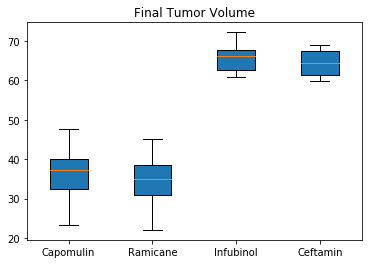

In [238]:
boxplot_data=[cap_list,ramicane_list,Infubinol_list,Ceftamin_list]
plt.boxplot(boxplot_data,patch_artist=True,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.title("Final Tumor Volume")
plt.show()

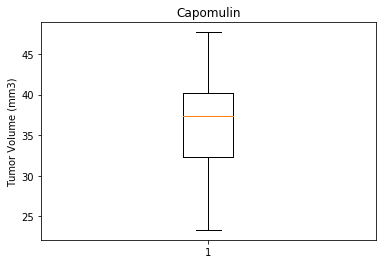

In [239]:
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

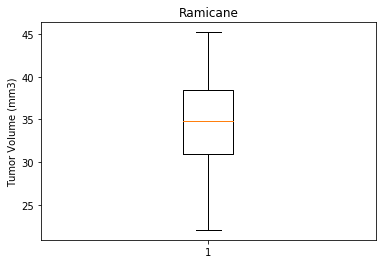

In [240]:
fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(ramicane_list)
plt.show()

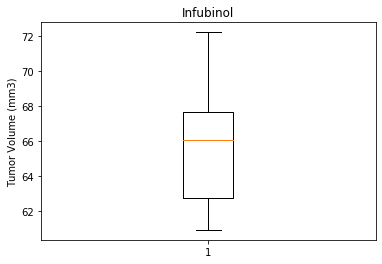

In [241]:
fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(Infubinol_list)
plt.show()

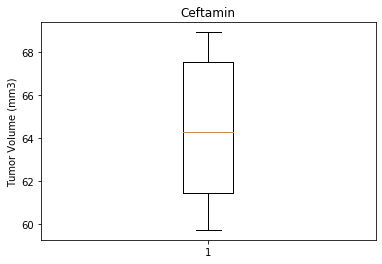

In [242]:
fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(Ceftamin_list)
plt.show()

## Line and scatter plots

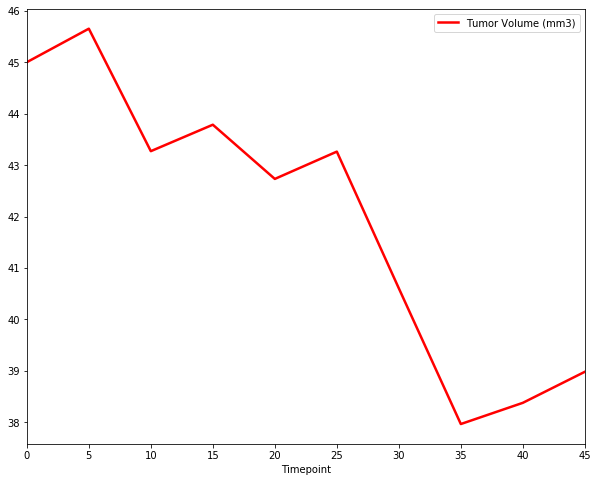

In [243]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
final3 = final.loc[data["Drug Regimen"] == "Capomulin"]
final4=final3.loc[final3["Mouse ID"] == "b128"]
final4=final4.loc[:,["Timepoint","Tumor Volume (mm3)"]]
final4.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='red')
plt.show()

In [244]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_final=final3.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_scatter=pd.DataFrame(scatter_final.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_scatter=avg_scatter.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_scatter=avg_scatter.set_index('Mouse ID')
avg_scatter

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


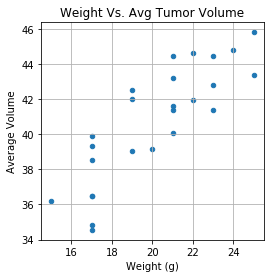

In [245]:
avg_scatter.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Avg Tumor Volume")
plt.show()

In [246]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = avg_scatter.iloc[:,0]
avg_tumor_volume = avg_scatter.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


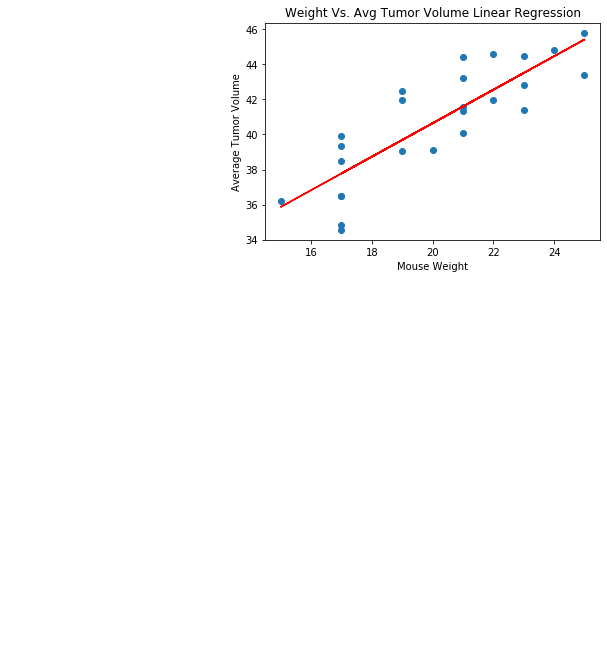

In [247]:
x_values = avg_scatter['Weight (g)']
y_values = avg_scatter['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Weight Vs. Avg Tumor Volume Linear Regression')
plt.show()

In [ ]:
#Observations on the data and charts
#From the data shown above it seems capomulin is the most used drug and has the second smallest avg. tumor volume.
#Second most used drug is ramicane and has the smalles avg. tumor volume. 
#The correlation between mouse weight and tumor volume is .84 which means that there is a strong correlations between both dependent variables.
#However it is not entirely perfect due to the spread of the plots.
#The mouse population in this data sample was nearly 50/50 between genders.
